In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# tqdm 进度条，如果开发系统不是jupyter notebook，
# 请替换下面一行为： from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm

# 用来加载图像和转换图像为numpy array
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

import os
%matplotlib inline

In [2]:
# 加载RBM类
import liteRBM as model

In [3]:
# 加载mnist手写数字训练样本
with np.load('mnist/mnist.npz') as data:
    x_train = data['x_train']
    x_test = data['x_test']
# 标准化，使所有值介于0 - 1之间
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


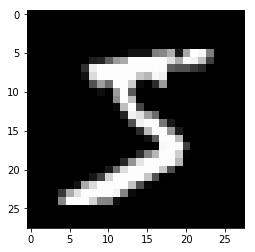

In [5]:
test_img = x_train[0]
plt.imshow(test_img, cmap=plt.cm.gray)

In [6]:
# reshape
x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [82]:
rbm = model.liteRBM(n_visible=784, n_hidden=256, lr=0.01, momentum=0.8)

In [83]:
# 训练模型， 验证样本为x_test前500个
errors = rbm.train(x_train, x_test[:500], n_epoches=30, batch_size=128)

training epoche 0/30:

validation loss: 0.174731851
training epoche 1/30:

validation loss: 0.157177329
training epoche 2/30:

validation loss: 0.146229491
training epoche 3/30:

validation loss: 0.138194099
training epoche 4/30:

validation loss: 0.132077709
training epoche 5/30:

validation loss: 0.127087712
training epoche 6/30:

validation loss: 0.122891426
training epoche 7/30:

validation loss: 0.119363688
training epoche 8/30:

validation loss: 0.116365150
training epoche 9/30:

validation loss: 0.113796912
training epoche 10/30:

validation loss: 0.111547448
training epoche 11/30:

validation loss: 0.109614998
training epoche 12/30:

validation loss: 0.107878968
training epoche 13/30:

validation loss: 0.106364354
training epoche 14/30:

validation loss: 0.105057247
training epoche 15/30:

validation loss: 0.103846692
training epoche 16/30:

validation loss: 0.102736019
training epoche 17/30:

validation loss: 0.101771519
training epoche 18/30:

validation loss: 0.100879744
training epoche 19/30:

validation loss: 0.100060478
training epoche 20/30:

validation loss: 0.099321105
training epoche 21/30:

validation loss: 0.098668158
training epoche 22/30:

validation loss: 0.097962707
training epoche 23/30:

validation loss: 0.097379118
training epoche 24/30:

validation loss: 0.096845068
training epoche 25/30:

validation loss: 0.096298911
training epoche 26/30:

validation loss: 0.095865667
training epoche 27/30:

validation loss: 0.095418684
training epoche 28/30:

validation loss: 0.094997577
training epoche 29/30:

validation loss: 0.094620176


Text(0,0.5,'Validation loss (rmse)')

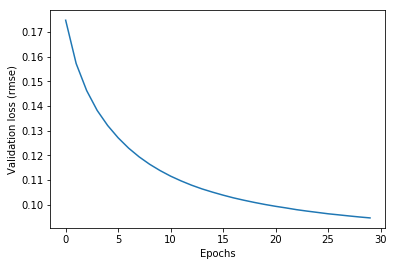

In [84]:
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Validation loss (rmse)')

In [89]:
# # 储存模型，注意替换文件夹目录和文件名
rbm.save_params(directory='./mnist', filename='mnist')

[WinError 183] 当文件已存在时，无法创建该文件。: './mnist'
model has been successfully saved!


In [11]:
# # 加载模型
# rbm.load_params(directory='./mnist', filename='mnist')

INFO:tensorflow:Restoring parameters from ././mnist/mnist
model has been successfully loaded


In [85]:
def show_img_from_array(a):
    plt.imshow(a.reshape((28, 28)), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.show()

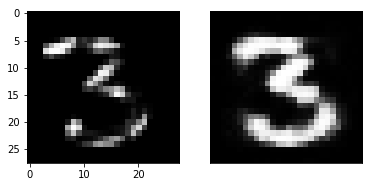

In [86]:
f, (ax1, ax2) = plt.subplots(1, 2)
test_img = load_img('mnist/test.png')
ax1.imshow(test_img, cmap=plt.cm.gray)

test_img = img_to_array(test_img)
test_img = test_img[:,:,1].reshape(1,-1)
test_img = rbm.reconstruct(test_img)
show_img_from_array(test_img)

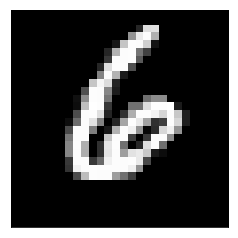

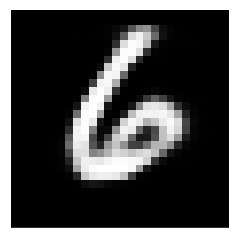

In [87]:
test_img = x_train[13]
show_img_from_array(test_img)
test_img = test_img.reshape(1,28*28)
test_img = rbm.reconstruct(test_img)
show_img_from_array(test_img)

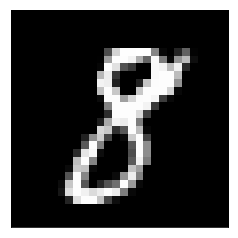

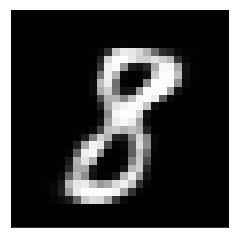

In [88]:
test_img = x_train[85]
show_img_from_array(test_img)
test_img = test_img.reshape(1,28*28)
test_img = rbm.reconstruct(test_img)
show_img_from_array(test_img)